In [1]:
import pandas as pd
heart_df = pd.read_csv("./data/SAheart.data")

In [2]:
heart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Questions
1. How many has heart disese vs no heart diseases ?
2. Does family history has any effect on heart diseases ?
3. HOw age,alchohol, tabboco impacts heart disease ?
4. What is the corealation between sbp, ldl typea and obesity ?
5. What is the probablity of getting heart diseases if age is more than 50?

In [3]:
heart_df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [4]:
pd.crosstab(heart_df.famhist, heart_df.chd, normalize = 'columns',margins = True)

chd,0,1,All
famhist,,,
Absent,0.682119,0.4,0.584416
Present,0.317881,0.6,0.415584


In [5]:
pd.crosstab(heart_df.famhist, heart_df.chd, normalize = 'index')

chd,0,1
famhist,,
Absent,0.762963,0.237037
Present,0.500000,0.500000


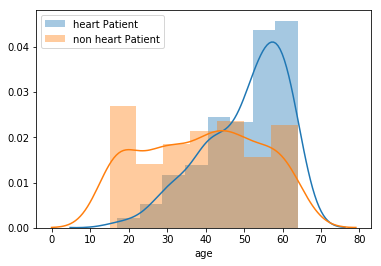

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.distplot(heart_df[heart_df.chd == 1].age, label = 'heart Patient')
sn.distplot(heart_df[heart_df.chd == 0].age, label = 'non heart Patient')
plt.legend();

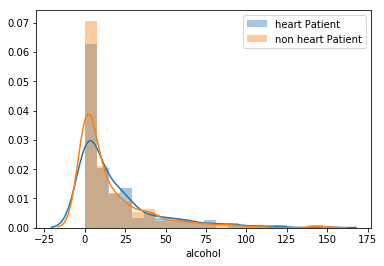

In [7]:
sn.distplot(heart_df[heart_df.chd == 1].alcohol, label = 'heart Patient', bins=20)
sn.distplot(heart_df[heart_df.chd == 0].alcohol, label = 'non heart Patient', bins=20)
plt.legend();

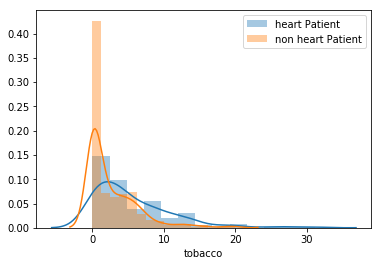

In [8]:
sn.distplot(heart_df[heart_df.chd == 1].tobacco, label = 'heart Patient')
sn.distplot(heart_df[heart_df.chd == 0].tobacco, label = 'non heart Patient')
plt.legend();

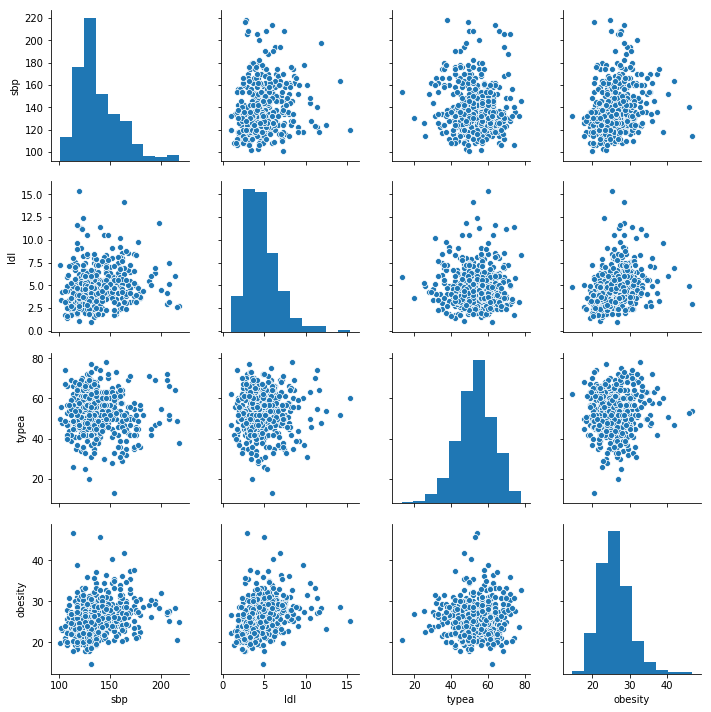

In [9]:
heart_df_v1 = heart_df[["sbp", "ldl", "typea", "obesity"]]
sn.pairplot(heart_df_v1);

In [10]:
heart_df_v1.corr()

,sbp,ldl,typea,obesity
sbp,1.000000,0.158296,-0.057454,0.238067
ldl,0.158296,1.000000,0.044048,0.330506
typea,-0.057454,0.044048,1.000000,0.074006
obesity,0.238067,0.330506,0.074006,1.000000


In [11]:
heart_df[heart_df.chd == 1].age.mean()
heart_df[heart_df.chd == 1].age.std()

10.649118943684005

In [12]:
from scipy import stats
1 - stats.norm.cdf(50, heart_df[heart_df.chd == 1].age.mean(),heart_df[heart_df.chd == 1].age.std()) 

0.5110032046407

In [13]:
from scipy import stats
a1, loc1, scale1 = stats.skewnorm.fit(heart_df[heart_df.chd == 1].age)
1 - stats.norm.cdf(50, loc1, scale1)

0.5110048135391664

In [14]:
heart_df[heart_df.chd == 1].age.mean()

50.29375

In [15]:
heart_df[heart_df.chd == 1].age.mode()

0    58
dtype: int64